<a href="https://colab.research.google.com/github/VenkataramanSuriya/AI-Projects-that-I-have-done/blob/main/30_Advanced_Inventory_Demand_Forecasting_using_Machine_Learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **30. Advanced Inventory Demand Forecasting using Machine Learning in Python**

**Importing the Dependencies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

**Data Loading For Analysis**

In [ ]:
data = pd.read_csv('/retail_sales_dataset.csv')

**Plot all data points in the dataset**

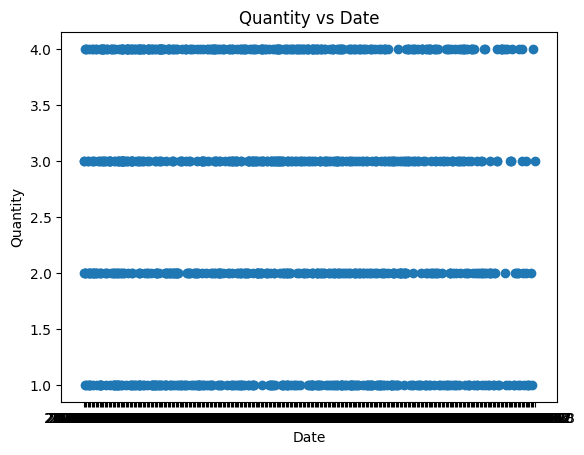

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['Date'], data['Quantity'])
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quantity vs Date')
plt.show()


**Data Exploration**

In [ ]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [ ]:
data.shape

(1000, 9)

In [ ]:
data.info

<bound method DataFrame.info of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount

In [ ]:
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

**Data Pre-Processing**

In [ ]:
label_encoders = {}

In [ ]:
categorical_columns = ['Customer ID', 'Gender', 'Product Category']

In [ ]:
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [ ]:
print(data.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


**Separating the features & Target**

In [ ]:
X = data[['Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']]
y = data['Quantity']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Plot the training and testing data**

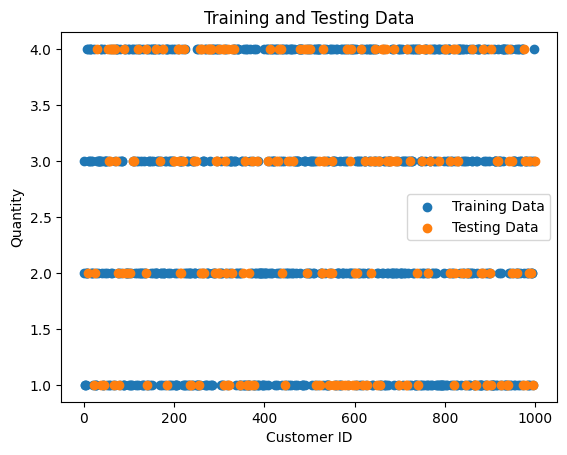

In [ ]:
plt.scatter(X_train['Customer ID'], y_train, label='Training Data')
plt.scatter(X_test['Customer ID'], y_test, label='Testing Data')
plt.xlabel('Customer ID')
plt.ylabel('Quantity')
plt.legend()
plt.title('Training and Testing Data')
plt.show()

**Model Training**

**Random Forest Regressor Model**

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Plot the training efficiency of the model**

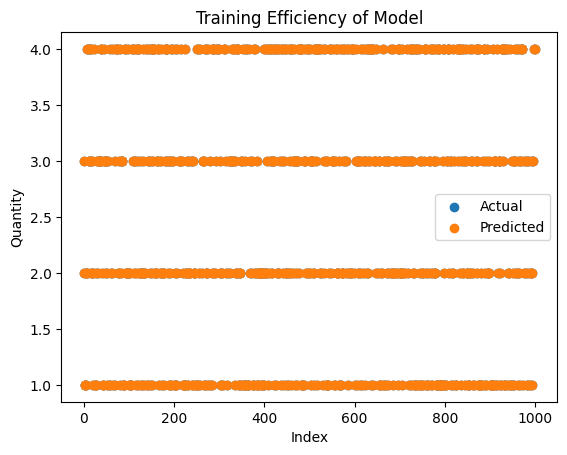

In [ ]:
train_predictions = model.predict(X_train)
plt.scatter(X_train.index, y_train, label='Actual')
plt.scatter(X_train.index, train_predictions, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.legend()
plt.title('Training Efficiency of Model')
plt.show()


**Test the model and plot testing efficiency**

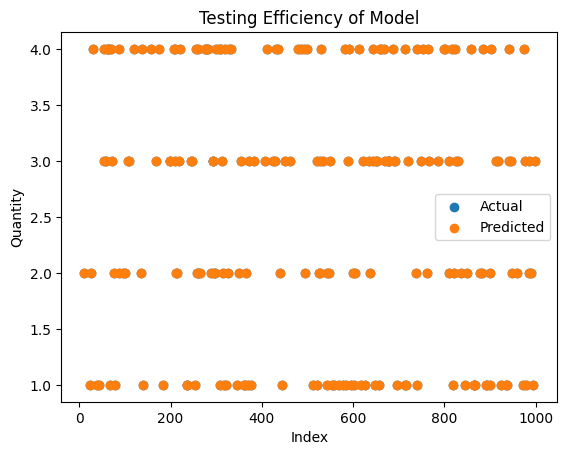

In [ ]:
test_predictions = model.predict(X_test)
plt.scatter(X_test.index, y_test, label='Actual')
plt.scatter(X_test.index, test_predictions, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.legend()
plt.title('Testing Efficiency of Model')
plt.show()

**Overall model evaluation**

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0


**Plot the overall efficiency of the model**

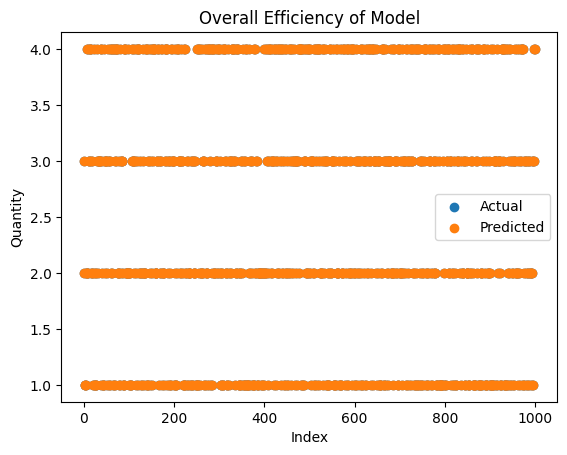

In [ ]:
all_predictions = model.predict(X)

plt.scatter(data.index, y, label='Actual')
plt.scatter(data.index, all_predictions, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.legend()
plt.title('Overall Efficiency of Model')
plt.show()